## EDA 2: Covtype Dataset Prepare data

### Exploratory Data Analysis 1
1. **REPEAT ANALYZE CLASS IMBALANCE** - Dataset is higly imbalanced
2. **CORRELATION ANALYSIS** - Correlation Matrix for all of the numerical features
3. **CLASS DISTRIBUTION** - Check whether the output variable is impalanced


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_covtype = pd.read_csv('Data/covtype_train.csv')
df_covtype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58096,3160,315,8,0,0,1366,199,234,174,1129,...,0,0,0,0,0,0,0,0,0,1
58097,2607,45,12,242,52,977,223,214,123,1342,...,0,0,0,0,0,0,0,0,0,2
58098,2317,280,25,190,64,433,144,233,225,582,...,0,0,0,0,0,0,0,0,0,3
58099,3183,89,17,60,8,3443,243,211,91,443,...,0,0,0,0,0,0,0,0,0,1


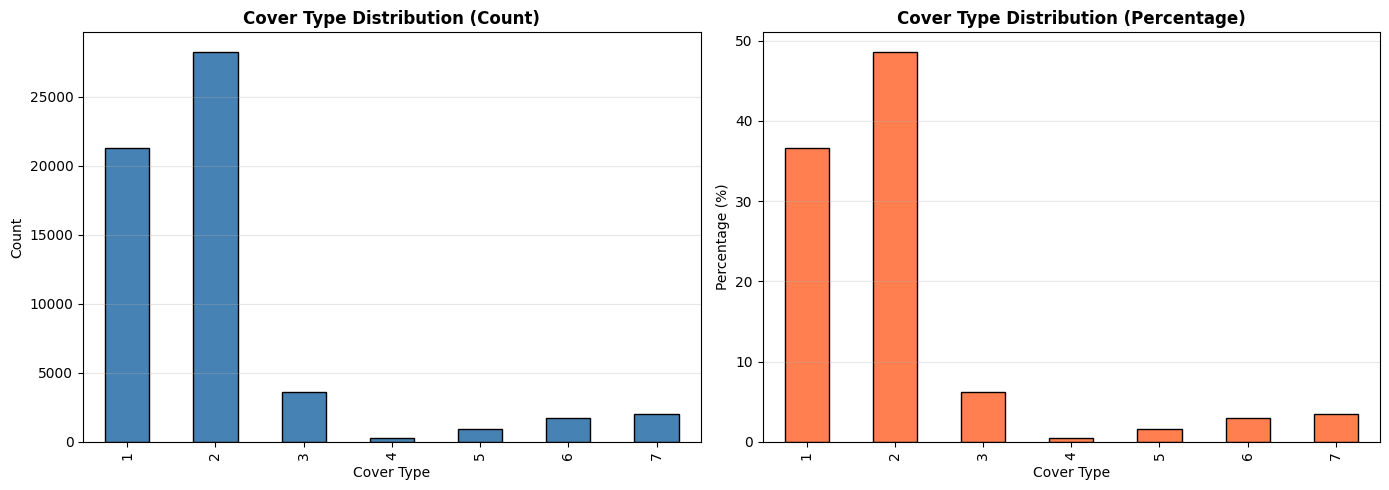

28248
259


In [2]:
# 1. Check (again) for imbalanced dataset
class_counts = df_covtype['Cover_Type'].value_counts().sort_index()
class_percentages = (df_covtype['Cover_Type'].value_counts(normalize=True).sort_index() * 100)
df_distribution = pd.concat([class_counts, class_percentages], axis=1)

df_distribution

# # Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

df_distribution['count'].plot(kind='bar', ax=ax1, edgecolor='black', color='steelblue')
ax1.set_title('Cover Type Distribution (Count)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Cover Type')
ax1.set_ylabel('Count')
ax1.grid(axis='y', alpha=0.3)

df_distribution['proportion'].plot(kind='bar', ax=ax2, edgecolor='black', color='coral')
ax2.set_title('Cover Type Distribution (Percentage)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Cover Type')
ax2.set_ylabel('Percentage (%)')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


max_class_count = class_counts.max()
print(max_class_count)
min_class_count = class_counts.min()
print(min_class_count)

In [3]:
# 2. Validate binary columns
wilderness_cols = np.where(df_covtype.columns.str.contains('Wilderness_Area'))
wilderness_cols = df_covtype.columns[wilderness_cols[0]].tolist()

soil_indices = np.where(df_covtype.columns.str.contains('Soil_Type'))
soil_type_cols = df_covtype.columns[soil_indices[0]].tolist()

unique_values = {}
counter = 0

for col in wilderness_cols + soil_type_cols:
    values = set(df_covtype[col].unique())
    if not values.issubset({0, 1}):
        print(f"Not all binary: {col, values}")
        Counter += 1
if counter == 0:
    print("All binary")

All binary


In [4]:
# 3. Normlaize and Standardize dataset due to imbalanced dataset
# Identify numerical features (exclude binary features and target)
exclude_cols = wilderness_cols + soil_type_cols + ["Cover_Type"]

numerical_features = [col for col in df_covtype.columns if col not in exclude_cols and df_covtype[col].dtype in ['int64', 'float64']]

print(len(numerical_features))
print(numerical_features)

print("Statistics Before Scaling:")
Stats_before_scaling_normalizing = pd.DataFrame(df_covtype[numerical_features].describe())
Stats_before_scaling_normalizing


10
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Statistics Before Scaling:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,2961.095695,156.183508,14.113045,269.666649,46.146831,2351.007676,212.197690,223.333660,142.471816,1984.694962
std,279.091350,112.026044,7.475782,212.153471,57.974062,1559.032488,26.746347,19.742694,38.488692,1324.055063
min,1871.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2997.000000,127.000000,13.000000,218.000000,29.000000,2007.000000,218.000000,226.000000,143.000000,1716.000000
75%,3165.000000,262.000000,18.000000,390.000000,68.000000,3331.000000,231.000000,237.000000,169.000000,2554.000000
max,3846.000000,360.000000,62.000000,1361.000000,597.000000,7087.000000,254.000000,254.000000,253.000000,7145.000000


In [ ]:
# Create copies for scaling and normalizing
df_scaled_covtype = df_covtype.copy()
df_normalized_covtype = df_covtype.copy()

# standardization
scaler_standard = StandardScaler()
df_scaled_covtype[numerical_features] = scaler_standard.fit_transform(df_covtype[numerical_features])

print("Statistics After Standardization:")
Standardized_df = pd.DataFrame(df_scaled_covtype[numerical_features].describe())
Standardized_df


Statistics After Standardization:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04,5.810100e+04
mean,-3.584143e-16,4.806170e-17,-6.643644e-17,-1.394156e-17,-1.968940e-17,1.023604e-16,1.631407e-16,-2.429073e-16,5.136365e-17,8.389396e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.905908e+00,-1.394183e+00,-1.887851e+00,-1.271103e+00,-3.780117e+00,-1.508004e+00,-7.933776e+00,-1.131232e+01,-3.701686e+00,-1.498965e+00
25%,-5.413890e-01,-8.675156e-01,-6.839536e-01,-7.620334e-01,-6.752531e-01,-7.985840e-01,-5.308318e-01,-5.234214e-01,-6.098419e-01,-7.255765e-01
50%,1.286482e-01,-2.605087e-01,-1.488880e-01,-2.435364e-01,-2.957698e-01,-2.206565e-01,2.169403e-01,1.350557e-01,1.372321e-02,-2.029351e-01
75%,7.306069e-01,9.445786e-01,5.199441e-01,5.672044e-01,3.769506e-01,6.285955e-01,7.029921e-01,6.922286e-01,6.892521e-01,4.299745e-01
max,3.170689e+00,1.819383e+00,6.405666e+00,5.144119e+00,9.501800e+00,3.037803e+00,1.562930e+00,1.553314e+00,2.871730e+00,3.897383e+00


In [11]:
# normalziation
scaler_minmax = MinMaxScaler()
df_normalized_covtype[numerical_features] = scaler_minmax.fit_transform(df_covtype[numerical_features])

print("Statistics After Normalization:")
Normalized_df = pd.DataFrame(df_normalized_covtype[numerical_features].describe())
Normalized_df


Statistics After Normalization:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,0.551947,0.433843,0.227630,0.198139,0.284606,0.331735,0.835424,0.879266,0.563130,0.277774
std,0.141312,0.311183,0.120577,0.155881,0.075291,0.219985,0.105301,0.077727,0.152129,0.185312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475443,0.163889,0.145161,0.079353,0.233766,0.156060,0.779528,0.838583,0.470356,0.143317
50%,0.570127,0.352778,0.209677,0.160176,0.262338,0.283195,0.858268,0.889764,0.565217,0.240168
75%,0.655190,0.727778,0.290323,0.286554,0.312987,0.470016,0.909449,0.933071,0.667984,0.357453
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


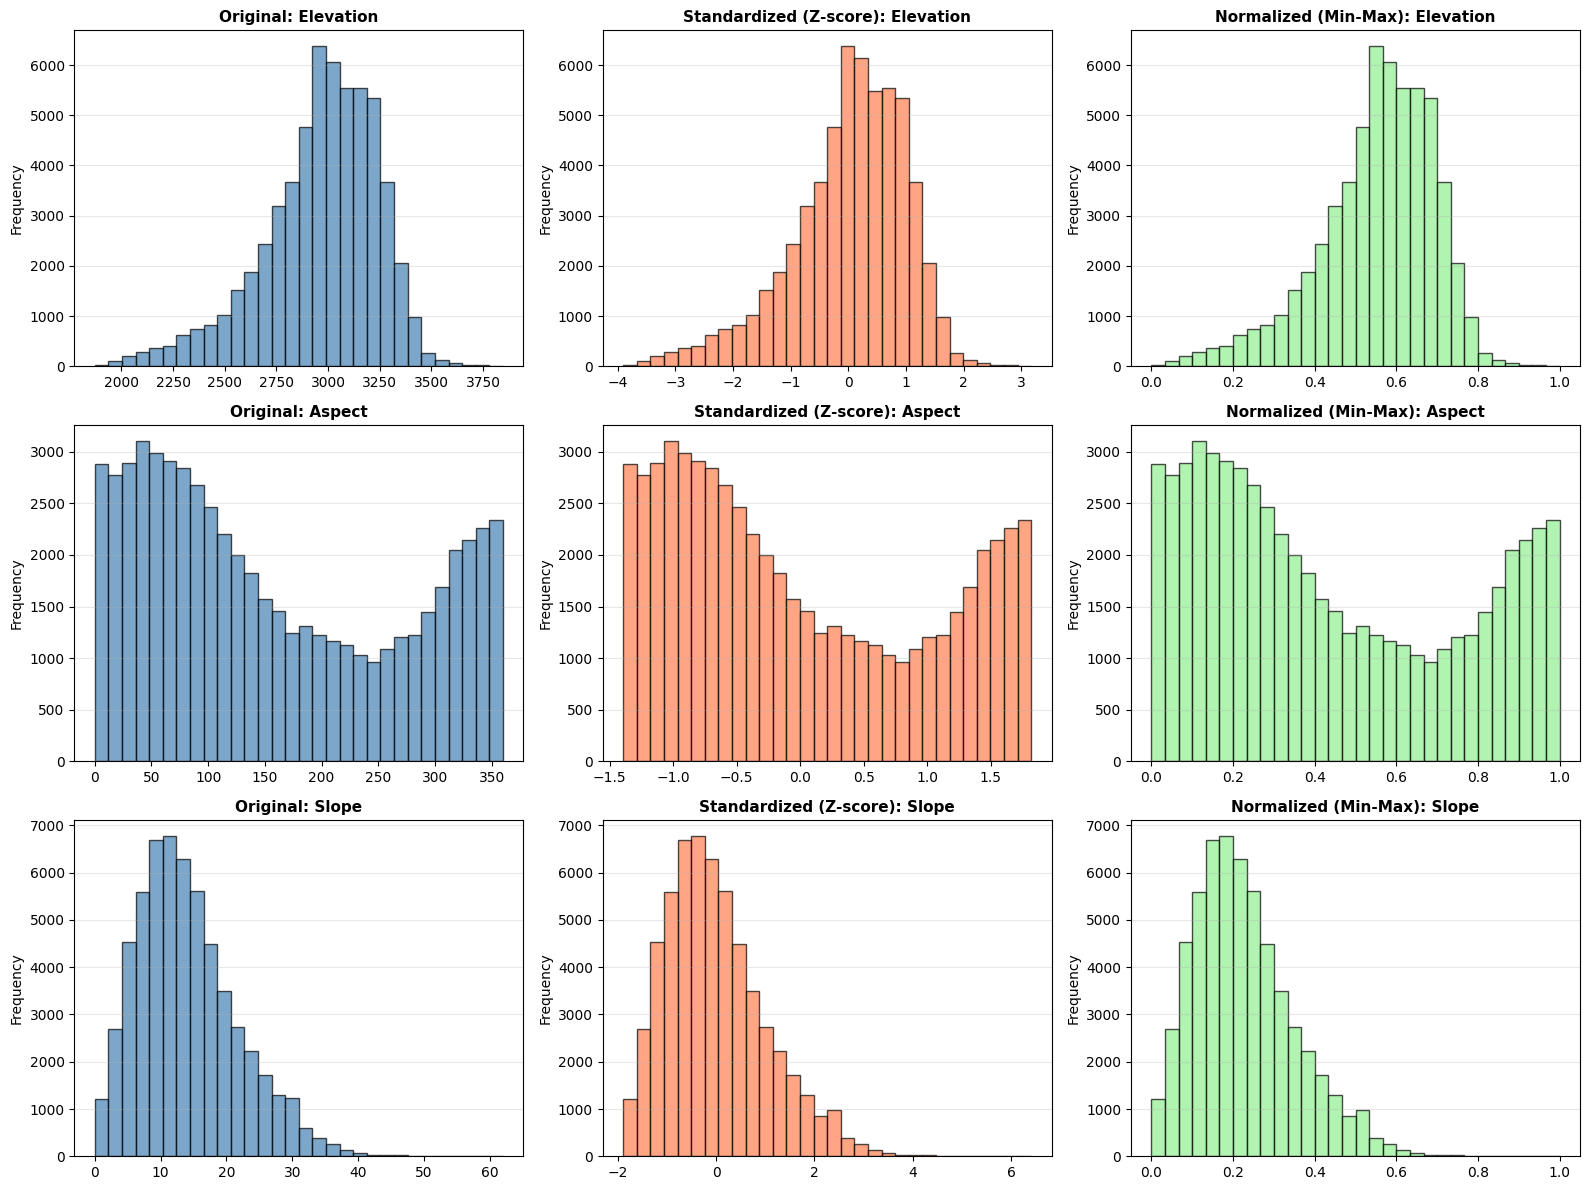

In [12]:
# Visualize before and after scaling
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

# Select first 3 numerical features for visualization
sample_features = numerical_features[:3]

for idx, feature in enumerate(sample_features):
    # Original
    axes[idx, 0].hist(df_covtype[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx, 0].set_title(f'Original: {feature}', fontweight='bold', fontsize=11)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # standardized data
    axes[idx, 1].hist(df_scaled_covtype[feature], bins=30, edgecolor='black', alpha=0.7, color='coral')
    axes[idx, 1].set_title(f'Standardized (Z-score): {feature}', fontweight='bold', fontsize=11)
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].grid(axis='y', alpha=0.3)

    # Normalized
    axes[idx, 2].hist(df_normalized_covtype[feature], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[idx, 2].set_title(f'Normalized (Min-Max): {feature}', fontweight='bold', fontsize=11)
    axes[idx, 2].set_ylabel('Frequency')
    axes[idx, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Export data to folder
df_scaled_covtype.to_csv("Data_Preprocessed/covtype_scaled.csv", index=False)
df_normalized_covtype.to_csv("Data_Preprocessed/covtype_normalized.csv", index=False)
